# Biodiversity Portfolio Project for Codecademy

I am attempting to see if there are themes to species extinction and the biodiversity in a National Parks Dataset. The overview of the project suggests that our goal is to find themes in whether the species is endangered. I'm assuming that NaN in some of the datasets means that they are not a Species of Concern (SOC).

Some questions I would pose are: 1. are the endangered or at risk species significantly more observed? 2. what is the geographic (park only) extent of the endangered species? 3. What are the statistical relationships? 

Future work would include a comparision of this information to food web data to try to understand if there are entire food chains at risk.



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load up and investigate dataframes
obs = pd.read_csv("observations.csv")
spec = pd.read_csv("species_info.csv")
#print(obs.head())
#print(spec.head())


Based on looking through the data a bit, it seems that the observations dataset is a dataset of how many sitings have occured by scientific name in different national parks. The species information dataset gives us a relationship between the scientific name and the common name. Additionally, the species information tells us about whether that species is endangered.

First off, I want to make one dataset with all of this data in it. I imagine presenting to experts I would want to refer to something with a species name, but most folks will want the common name. 

In [3]:
#want to inner join the dataframes on scientific_name because that way we can have one dataframe with all of the information
newdf = pd.merge(left = obs, right = spec, left_on="scientific_name", right_on="scientific_name")
print(newdf.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  


In [4]:
#strip all rows that have NaN in conservation_status because we want to know about the species that we know the conservation status of. 
finaldf = newdf.dropna()

In [5]:
#now we only have plants and animals that we are concerned about
uni_names = finaldf.scientific_name.unique()
#print(uni_names)

In [6]:
num = list(range(len(uni_names)))
#another = pd.DataFrame(uni_names, columns="uni_names")

Text(0, 0.5, 'Average Observation #')

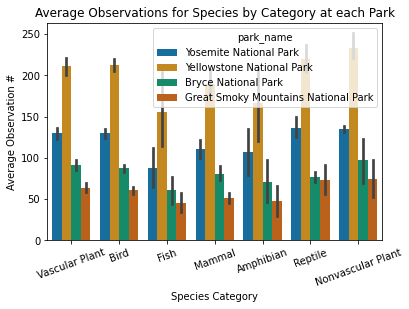

In [7]:
sns.set_palette('colorblind')
sns.barplot(data = finaldf, x = "category", y = "observations", hue = "park_name")
plt.xticks(rotation = 20)
plt.title("Average Observations for Species by Category at each Park")
plt.xlabel("Species Category")
plt.ylabel("Average Observation #")

Text(0, 0.5, 'Average Observation #')

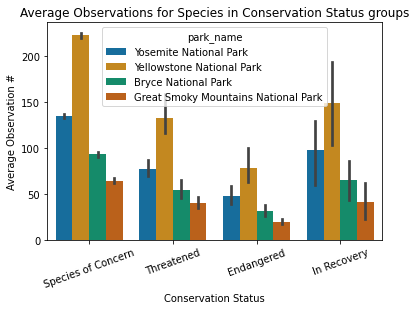

In [27]:

sns.barplot(data=finaldf, x="conservation_status", y="observations", hue = "park_name")
plt.xticks(rotation = 20)
plt.title("Average Observations for Species in Conservation Status groups")
plt.xlabel("Conservation Status")
plt.ylabel("Average Observation #")




Text(0.5, 1.0, 'Average Observations for Species in Conservation Status Groups')

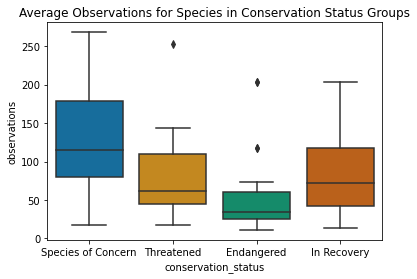

In [28]:
sns.boxplot(data=finaldf, x="conservation_status", y="observations")
plt.title("Average Observations for Species in Conservation Status Groups")

Based on these results, it seems that Yellowstone and Yosemite National Parks have the most observations of species that are of concern. However, I would like to know what percentage of the species at these parks are of concern. Generally, one can not conclude from this that there are more or less species with concerning status if we do not know the policy regarding observation at each of the parks. 

Text(0, 0.5, 'Average Observation #')

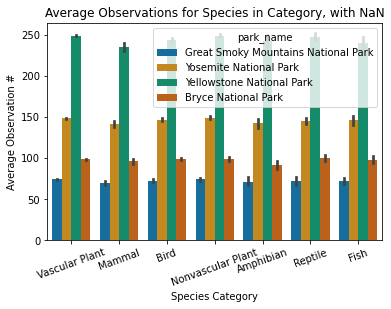

In [9]:
sns.barplot(data=newdf, x="category", y="observations", hue = "park_name")
plt.xticks(rotation = 20)
plt.title("Average Observations for Species in Category, with NaN")
plt.xlabel("Species Category")
plt.ylabel("Average Observation #")

In [10]:
#calculating percentages of species in each category that are endangered
cats = finaldf.category.unique()
#vascpl_soc = finaldf[finaldf.category == 'Vascular Plant']
#mam_soc = finaldf[finaldf.category == "Mammal"]
def my_function(cat, adf):
    newdfname = adf[adf.category == cat]
    return newdfname

mam_soc = my_function("Mammal", finaldf)
vascpl_soc = my_function("Vascular Plant", finaldf)
bird_soc = my_function("Bird", finaldf)
nonvsc_soc = my_function("Nonvascular Plant", finaldf)
amp_soc = my_function("Amphibian", finaldf)
rep_soc = my_function("Reptile", finaldf)
fish_soc = my_function("Fish", finaldf)

mam = my_function("Mammal", newdf)
vascpl = my_function("Vascular Plant", newdf)
bird = my_function("Bird", newdf)
nonvsc = my_function("Nonvascular Plant", newdf)
amp = my_function("Amphibian", newdf)
rep = my_function("Reptile", newdf)
fish = my_function("Fish", newdf)



def my2func(adf, asecdf):
    length1 = len(adf)
    length2 = len(asecdf)
    percentage = length1/length2 * 100
    return percentage


perc_mam = my2func(mam_soc, mam)
perc_vaspl = my2func(vascpl_soc, vascpl)
perc_bird = my2func(bird_soc, bird)
perc_nonvsc = my2func(nonvsc_soc, nonvsc)
perc_amp = my2func(amp_soc, amp)
perc_rep = my2func(rep_soc, rep)
perc_fish = my2func(fish_soc, fish)


[19.333333333333332, 0.9406952965235175, 14.720812182741117, 1.5015015015015014, 8.536585365853659, 6.172839506172839, 9.16030534351145]


Text(0.5, 0, 'Species Category')

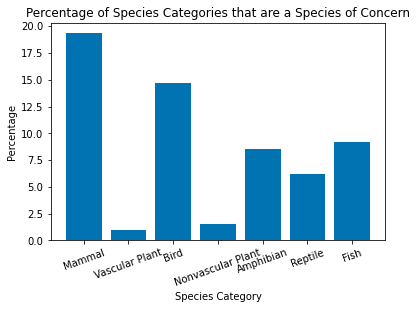

In [11]:
#plot the percentages
x = ["Mammal", "Vascular Plant", "Bird", "Nonvascular Plant", "Amphibian", "Reptile", "Fish"]
y = []
y.append(perc_mam)
y.append(perc_vaspl)
y.append(perc_bird)
y.append(perc_nonvsc)
y.append(perc_amp)
y.append(perc_rep)
y.append(perc_fish)
print(y)
plt.bar(x = x, height=y)
plt.xticks(rotation = 20)
plt.title("Percentage of Species Categories that are a Species of Concern")
plt.ylabel("Percentage")
plt.xlabel("Species Category")

Conclusions: Yellowstone NP counts significantly more species than other parks. Without an understanding of how the park has been tasked with counting species, we cannot conclude what this statistic is saying. Overall, there are similar amounts of observations across different types of species that are in one of the species of concern categories. However, there are more species of concern then there are threatened or endangered species. Finally, mammals as a species grouping have the largest percentage of species of concern across the parks, where as vascular plants as a species group have the lowest. It is unclear, based on the data, if this reflects sampling bias. 

Future work would integrate this data with policies at these parks to better understand the information and to make better recommendations. 

